In [1]:
from dataset import create_dataloaders

# simple usage
train_loader, val_loader, test_loader, classes = create_dataloaders('Aerial_Landscapes')

# custom parameters
train_loader, val_loader, test_loader, classes = create_dataloaders(
    root_dir='Aerial_Landscapes',
    batch_size=32,
    split_ratio=[0.7, 0.15, 0.15],
    augmentation_strategy='extensive',
    random_seed=42,
    verbose=True
)

Creating data loaders, batch_size=32, split_ratio=[0.6, 0.2, 0.2], augmentation=default...
Dataset size - Train: 7200, Validation: 2400, Test: 2400
Training set class distribution:
- Agriculture: 480 images
- Airport: 480 images
- Beach: 480 images
- City: 480 images
- Desert: 480 images
- Forest: 480 images
- Grassland: 480 images
- Highway: 480 images
- Lake: 480 images
- Mountain: 480 images
- Parking: 480 images
- Port: 480 images
- Railway: 480 images
- Residential: 480 images
- River: 480 images
Creating data loaders, batch_size=32, split_ratio=[0.7, 0.15, 0.15], augmentation=extensive...
Dataset size - Train: 8400, Validation: 1800, Test: 1800
Training set class distribution:
- Agriculture: 560 images
- Airport: 560 images
- Beach: 560 images
- City: 560 images
- Desert: 560 images
- Forest: 560 images
- Grassland: 560 images
- Highway: 560 images
- Lake: 560 images
- Mountain: 560 images
- Parking: 560 images
- Port: 560 images
- Railway: 560 images
- Residential: 560 images
- 

In [3]:
train_loader.dataset.__len__(), val_loader.dataset.__len__(), test_loader.dataset.__len__()

(9600, 0, 2400)

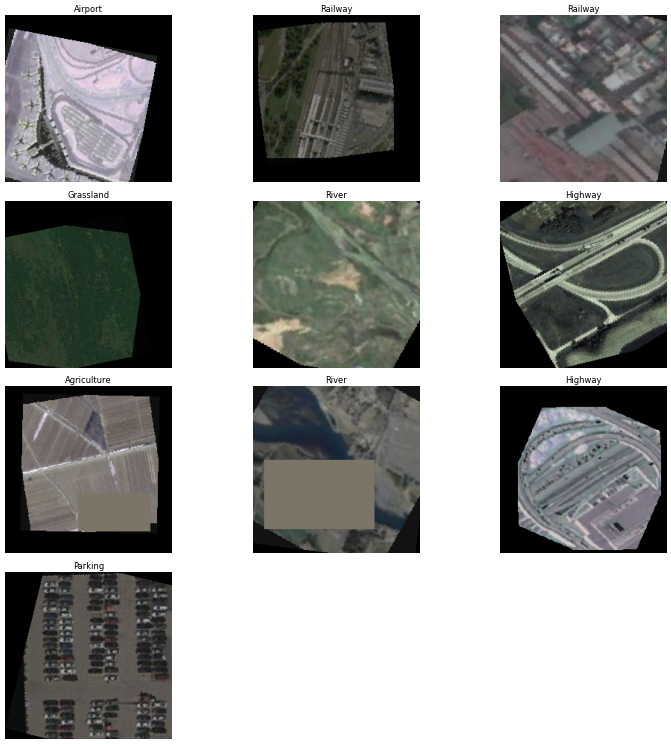

In [5]:
# randomly plot 100 images from train_loader
import matplotlib.pyplot as plt
import numpy as np
import random

# Randomly select 100 images from the dataset
dataset = train_loader.dataset
indices = random.sample(range(len(dataset)), min(10, len(dataset)))

# Set up the image layout
rows = int(np.ceil(np.sqrt(len(indices))))
cols = int(np.ceil(len(indices) / rows))

plt.figure(figsize=(15, 15),dpi=50)

for i, idx in enumerate(indices):
    # Get image and label
    img, label = dataset[idx]
    
    # Convert image to displayable format
    img = img.permute(1, 2, 0).numpy()
    
    # Denormalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    # Display the image
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{classes[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
